In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [3]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
from sklearn.manifold import TSNE

In [8]:
tsne = TSNE(n_components=2,
            learning_rate=250,
            random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

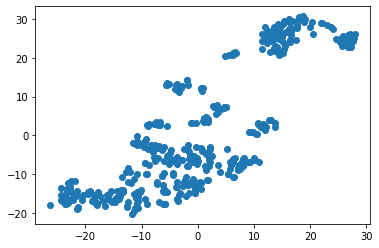

In [9]:
plt.scatter(X_train_tsne[:, 0],
            X_train_tsne[:, 1]);

2 EX.

In [10]:
from sklearn.cluster import KMeans

In [11]:
n_clusters=3
model = KMeans(n_clusters=n_clusters, random_state=42, max_iter=100)

In [12]:
X_train_labels = model.fit_predict(X_train_scaled)
print(X_train_labels)

[1 2 0 1 2 2 2 0 1 1 2 2 2 1 2 2 2 0 2 0 1 2 0 2 0 2 1 0 2 0 2 2 1 1 2 0 0
 2 2 0 0 2 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 0 2 1 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 0 2 1 1 2 1 2 0 0 0 2 2 0 2 2 2 1
 0 2 0 0 1 1 1 2 2 2 1 1 2 0 1 1 0 0 1 0 2 2 2 2 1 2 0 2 1 2 1 2 2 2 1 2 2
 2 2 2 1 0 2 0 1 1 1 1 1 0 2 1 2 1 0 0 2 0 2 2 0 0 1 0 0 1 1 0 2 2 2 1 2 1
 1 0 0 1 1 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 0 2 2 2 2 0 2 1 2 1 0 1 2 1 1 1
 1 2 2 0 0 2 0 2 1 2 2 2 2 2 1 1 0 2 2 0 0 1 1 2 0 1 1 2 0 0 1 2 0 1 2 2 1
 2 1 2 2 0 2 2 2 2 2 2 0 1 2 1 2 2 0 2 1 1 0 1 2 1 2 2 1 0 0 2 1 0 1 1 1 2
 0 1 2 2 2 2 2 2 1 0 2 1 0 0 2 0 2 0 2 1 0 2 2 2 0 1 2 1 1 2 1 0 2 2 1 2 1
 1 2 2 1 0 2 2 0 2 2 2 1 2 2 2 2 1 2 1 2 0 0 1 0 1 2 1 0 2 1 0 2 0 2 0 2 0
 2 2 1 2 0 1 0 1 2 1 0 2 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 0 2 2 2 0 1 2]


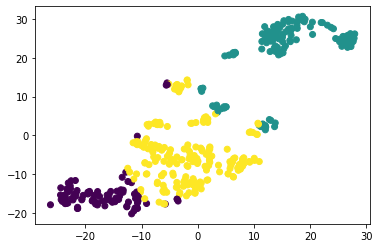

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_labels);

In [14]:
for i in range(n_clusters):
  print('-'*100)
  print(
      'среднее значение price в кластере {}'.format(i),
      y_train[X_train_labels == i].mean()
  )
  print(
      'среднее значение CRIM в кластере {}'.format(i),
      pd.DataFrame(X_train['CRIM'])[X_train_labels == i].mean()
  )

----------------------------------------------------------------------------------------------------
среднее значение price в кластере 0 price    27.788372
dtype: float64
среднее значение CRIM в кластере 0 CRIM    0.073566
dtype: float64
----------------------------------------------------------------------------------------------------
среднее значение price в кластере 1 price    16.165354
dtype: float64
среднее значение CRIM в кластере 1 CRIM    10.797028
dtype: float64
----------------------------------------------------------------------------------------------------
среднее значение price в кластере 2 price    24.958115
dtype: float64
среднее значение CRIM в кластере 2 CRIM    0.42166
dtype: float64


3 ex.

In [15]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [16]:
X_test_labels = model.predict(X_test_scaled)
print(X_test_labels)

[2 0 1 2 1 2 2 1 1 2 2 2 1 2 2 1 2 1 0 1 0 0 2 2 1 1 2 1 2 2 2 2 1 1 1 1 2
 2 2 2 2 2 0 2 2 1 2 2 1 2 2 0 2 2 2 1 1 0 2 2 0 0 2 2 0 2 1 0 0 1 2 1 1 0
 2 1 2 0 1 1 0 1 0 1 2 2 1 2 2 2 2 1 2 2 1 2 1 1 1 1 2 2]


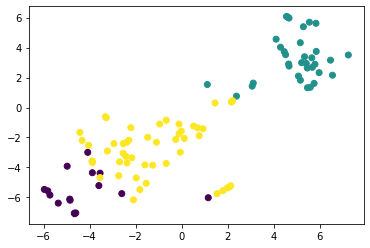

In [17]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=X_test_labels);

In [18]:
for i in range(n_clusters):
  print('-'*100)
  print(
      'среднее значение price в кластере {}'.format(i),
      y_test[X_test_labels == i].mean()
  )
  print(
      'среднее значение CRIM в кластере {}'.format(i),
      pd.DataFrame(X_test['CRIM'])[X_test_labels == i].mean()
  )

----------------------------------------------------------------------------------------------------
среднее значение price в кластере 0 price    31.35
dtype: float64
среднее значение CRIM в кластере 0 CRIM    0.06206
dtype: float64
----------------------------------------------------------------------------------------------------
среднее значение price в кластере 1 price    16.437143
dtype: float64
среднее значение CRIM в кластере 1 CRIM    10.165531
dtype: float64
----------------------------------------------------------------------------------------------------
среднее значение price в кластере 2 price    21.860784
dtype: float64
среднее значение CRIM в кластере 2 CRIM    0.266079
dtype: float64
